# Cross-response functions

$$ r_{i} (t,\tau) = \log m_{i}(t + \tau) - \log m_{i}(t) = \log \frac{m_{i}(t + \tau)}{m_{i}(t)} $$
$$ R_{ij}^{(exc. 0)}(\tau) = \left \langle r_i(t,\tau) \epsilon_{j} t \right \rangle_t^{(exc. 0)} $$

In [1]:
# Import modules

from matplotlib import pyplot as plt
import numpy as np
import pickle

%matplotlib inline

In [2]:
# Using the only two common stocks in both data sets
ticker_i = 'AAPL'
ticker_j = 'MSFT'
day = '07'

In [3]:
# Load data
_midpoint_i = pickle.load(open('../Data/midpoint_data/midpoint_201603%s_%s.pickl' % (day,ticker_i), 'rb'))
_midpoint_j = pickle.load(open('../Data/midpoint_data/midpoint_201603%s_%s.pickl' % (day,ticker_j), 'rb'))
_trade_sign_j = pickle.load(open('../Data/trade_signs_data/trade_signs_most_201603%s_%s.pickl' % (day,ticker_j), 'rb'))
_trade_sign_i = pickle.load(open('../Data/trade_signs_data/trade_signs_most_201603%s_%s.pickl' % (day,ticker_i), 'rb'))
time = pickle.load(open('../Data/midpoint_data/time.pickl', 'rb'))

In [4]:
# Test for tau = 1000 ms = 1s
# Setting variables to work with 1s accuracy

cross_response_tau = np.zeros(1000)   # Array of the average of each tau (in this case, save the position 0)
_trade_sign_j_sec = _trade_sign_j[::1000] # Use only the values != 0 in the trade signs array
trade_sign_j_sec = _trade_sign_j_sec[_trade_sign_j_sec != 0]
midpoint_i_sec = _midpoint_i[::1000]
time_sec = time[::1000]
_log_return_i = 0. * time_sec # Every second have a log-return

In [5]:
for tau in range(1000):
    
    _log_return_i = 0. * time_sec
    
    for t_idx in range(len(time_sec)):
        if (t_idx + tau < len(time_sec)):
            _log_return_i[t_idx] = np.log(midpoint_i_sec[t_idx + tau] / midpoint_i_sec[t_idx])

    log_return_i_ = _log_return_i[_trade_sign_j_sec != 0]
    
    #print(log_return_i_ * )

    cross_response_tau[tau] = np.mean(log_return_i_ * trade_sign_j_sec)

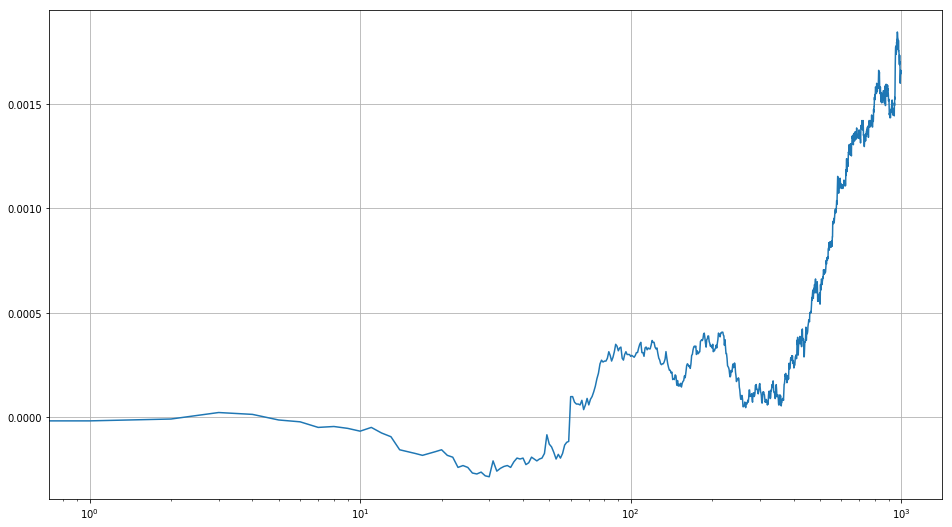

In [8]:
plt.figure(figsize=(16,9))

plt.semilogx(cross_response_tau)
plt.grid(True)


In [7]:
print(trade_sign_j_sec)

[-1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1.]
